In [1]:
import nltk
%matplotlib inline

import sys
import streamlit as st
import os
import pandas as pd
import pickle
import numpy as np
import plotly.figure_factory as ff
import plotly.express as px
import copy
import math
import scipy
import plotly.graph_objects as go
import shelve
import plotly.express as px
import pandas as pd
from random import sample
from scipy.stats import pearsonr
from science_access.t_analysis import not_want_list
import seaborn as sns

not_want_list.extend(
    ["link", "librarian", "issue", "abstract", "science", "cookie", "publication"]
)

from science_access.online_app_backend import call_from_front_end
from science_access.online_app_backend import ar_manipulation
from science_access.t_analysis import text_proc
from science_access.online_app_backend import semantic_scholar_alias



from science_access.enter_author_name import (
    art_cloud,
    create_giant_strings,
    art_cloud_wl,
    zipf_plot,
)
from science_access.enter_author_name import (
    distribution_plot_from_scrape,
    grand_distribution_plot,
    data_frames_from_scrape,
)
from science_access.enter_author_name import (
    push_frame_to_screen,
    fast_art_cloud,
    grab_data_for_splash,
)
from science_access.enter_author_name import (
    frame_to_lists,
    try_and_update_cache,
    extra_options,
)
import matplotlib.pyplot as plt





/home/user/anaconda3/lib/python3.7/site-packages/geopandas/_compat.py:88: UserWarning:

The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.



In [2]:
f = open('data/list_of_authors.md', 'r')
fileString = f.readlines()
get_authors = []
for line in fileString:
    if len(line):
        if len(line.split("|"))>2:
            get_authors.append(line.split("|")[2])
            #print(get_authors[-1])
get_authors2 = []
for auth in get_authors:
    if "," in auth:
        auth0 = auth.split(",")[0]
        auth1 = auth.split(",")[1]

        get_authors2.append(auth0)
        get_authors2.append(auth1)
    if "and" in auth:
        auth0 = auth.split("and")[0]
        auth1 = auth.split("and")[1]

        get_authors2.append(auth0)
        get_authors2.append(auth1)

    else:
        get_authors2.append(auth)


del get_authors2[-3]
del get_authors2[-3]

get_authors2

[' Eric Steven Raymond ',
 'D.M. Nichols',
 ' N.Frishberg',
 'Peter Trudelle',
 'D.M. Nichols',
 'C Benson',
 'E. Golden',
 'M. S. Andreasen',
 'Reitmayr',
 'Mark Aberdour',
 'N. Viorres',
 'M. Bødker',
 'G.Çetin',
 'Matthew Paul Thomas',
 'H.Hedberg and N.Iivari',
 'Paula M. Bach',
 'Paula M. Bach',
 'Paula M. Bach and John M. Carroll',
 'Paula M. Bach',
 'A.Raza and L.F.Capretz',
 'A.Raza and L.F.Capretz',
 'M.Rajanen and N.Iivary',
 'Benjamin M. Hill and Andrés Monroy-Hernández',
 'M.Rajanen',
 'M.Rajanen and N.Iivary',
 'Mikko Rajanen & Netta Iivari',
 'Michelle W. Purcell',
 ' Jan-Christoph Borchardt',
 'Jan Dittrich']

In [3]:
def get_test_data(author_name):
    ar = call_from_front_end(author_name, tns=10, fast=True)
    author = pd.DataFrame(ar)
    try:
        corr, _ = pearsonr(author["numCitedBy"], author["standard"])
        return (author["numCitedBy"],author["standard"],author)
    except:
        print(author)
        return None,None,author

In [4]:
listed=[]
multi_author_frame = pd.DataFrame()

In [5]:
for author in get_authors2:
    print(author)
    (author_numCitedBy,author_standard,df) = get_test_data(author)

    multi_author_frame = pd.concat([multi_author_frame,df])
#listed.append((author_numCitedBy,author_standard))

 Eric Steven Raymond 


2021-06-13 12:09:42.063 WARNING root: 
  command:

    streamlit run /home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py [ARGUMENTS]
/home/user/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning:

Mean of empty slice.

/home/user/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning:

invalid value encountered in double_scalars



Empty DataFrame
Columns: []
Index: []
D.M. Nichols


/home/user/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning:

Mean of empty slice.

/home/user/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning:

invalid value encountered in double_scalars



Empty DataFrame
Columns: []
Index: []
 N.Frishberg


/home/user/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning:

Mean of empty slice.

/home/user/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning:

invalid value encountered in double_scalars



Empty DataFrame
Columns: []
Index: []
Peter Trudelle


/home/user/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning:

Mean of empty slice.

/home/user/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning:

invalid value encountered in double_scalars



Empty DataFrame
Columns: []
Index: []
D.M. Nichols


/home/user/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning:

Mean of empty slice.

/home/user/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning:

invalid value encountered in double_scalars



Empty DataFrame
Columns: []
Index: []
C Benson
E. Golden
M. S. Andreasen


/home/user/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning:

Mean of empty slice.

/home/user/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning:

invalid value encountered in double_scalars



Empty DataFrame
Columns: []
Index: []
Reitmayr
Mark Aberdour
   citationVelocity    fieldsOfStudy  numCitedBy  semantic  \
0                 0  ['Engineering']           5      True   

                                                link  science big_words  \
0  Transforming Workplace Learning Culture with D...     True        []   

   standard  fre_unbiased  standard_unbiased  \
0       0.0         78.59                0.0   

                                        hard_snippet  wcount  \
0  today’ businesses are moving faster than ever ...      85   

                                              tokens  uniqueness  \
0  [today, businesses, are, moving, faster, than,...    0.705882   

   unique_words        sp        ss   sp_norm   ss_norm     gf  
0            60  0.133333  0.522222  0.133333  0.522222  38.24  
N. Viorres


/home/user/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning:

Mean of empty slice.

/home/user/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning:

invalid value encountered in double_scalars



Empty DataFrame
Columns: []
Index: []
M. Bødker
G.Çetin


/home/user/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning:

Mean of empty slice.

/home/user/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning:

invalid value encountered in double_scalars



Empty DataFrame
Columns: []
Index: []
Matthew Paul Thomas


/home/user/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning:

Mean of empty slice.

/home/user/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning:

invalid value encountered in double_scalars



Empty DataFrame
Columns: []
Index: []
H.Hedberg and N.Iivari


/home/user/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning:

Mean of empty slice.

/home/user/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning:

invalid value encountered in double_scalars



Empty DataFrame
Columns: []
Index: []
Paula M. Bach
Paula M. Bach
Paula M. Bach and John M. Carroll


/home/user/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning:

Mean of empty slice.

/home/user/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning:

invalid value encountered in double_scalars



Empty DataFrame
Columns: []
Index: []
Paula M. Bach
A.Raza and L.F.Capretz


/home/user/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning:

Mean of empty slice.

/home/user/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning:

invalid value encountered in double_scalars



Empty DataFrame
Columns: []
Index: []
A.Raza and L.F.Capretz


/home/user/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning:

Mean of empty slice.

/home/user/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning:

invalid value encountered in double_scalars



Empty DataFrame
Columns: []
Index: []
M.Rajanen and N.Iivary


/home/user/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning:

Mean of empty slice.

/home/user/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning:

invalid value encountered in double_scalars



Empty DataFrame
Columns: []
Index: []
Benjamin M. Hill and Andrés Monroy-Hernández


/home/user/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning:

Mean of empty slice.

/home/user/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning:

invalid value encountered in double_scalars



Empty DataFrame
Columns: []
Index: []
M.Rajanen


/home/user/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning:

Mean of empty slice.

/home/user/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning:

invalid value encountered in double_scalars



Empty DataFrame
Columns: []
Index: []
M.Rajanen and N.Iivary


/home/user/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning:

Mean of empty slice.

/home/user/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning:

invalid value encountered in double_scalars



Empty DataFrame
Columns: []
Index: []
Mikko Rajanen & Netta Iivari
Michelle W. Purcell
 Jan-Christoph Borchardt


/home/user/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning:

Mean of empty slice.

/home/user/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning:

invalid value encountered in double_scalars



Empty DataFrame
Columns: []
Index: []
Jan Dittrich


In [6]:
multi_author_frame

,citationVelocity,fieldsOfStudy,numCitedBy,semantic,link,science,big_words,standard,fre_unbiased,standard_unbiased,hard_snippet,wcount,tokens,uniqueness,unique_words,sp,ss,sp_norm,ss_norm,gf
0,0,['Medicine'],2,True,Crossed–uncrossed projections from primate ret...,True,[],127.0,73.718000,47.0,,308,"[significance, many, mammals, with, frontal, e...",0.483766,149,0.101923,0.448397,0.101923,0.448397,128.91
1,0,['Medicine'],0,True,Plant-Derived Food Grade Substances (PDFGS) Ac...,True,[],0.0,60.658333,47.0,,306,"[human, diet, comprises, several, classes, of,...",0.581699,178,0.030567,0.356933,0.030567,0.356933,129.05
2,0,['Medicine'],0,True,Plant-Derived Food Grade Substances (PDFGS) Ac...,True,[],0.0,60.658333,47.0,,306,"[human, diet, comprises, several, classes, of,...",0.581699,178,0.030567,0.356933,0.030567,0.356933,129.05
3,0,['Medicine'],0,True,Approach to screening for Familial Adenomatous...,True,[],0.0,91.008824,43.0,,226,"[introduction, desmoid, type, fibromatosis, df...",0.553097,125,0.292424,0.651414,0.292424,0.651414,98.73
4,0,['Medicine'],0,True,Semiautomated carotid artery plaque compositio...,True,[],19.0,74.783750,68.0,,228,"[little, remains, known, about, the, connectio...",0.508772,116,0.192321,0.515268,0.192321,0.515268,98.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,0,['Materials Science'],0,True,Microstructure and Mechanical Strength of Attr...,True,[],18.0,57.710000,65.0,,204,"[gas, atomized, powder, of, an, mg, nd, magnes...",0.500000,102,0.172222,0.733333,0.172222,0.733333,89.20
4,0,['Materials Science'],8,True,Characterization of deformation mechanisms in ...,True,[],40.0,71.738750,39.0,,88,"[adaptive, sequential, means, ask, analysis, o...",0.715909,63,0.040000,0.180000,0.040000,0.180000,41.56
5,0,['Materials Science'],8,True,Characterization of deformation mechanisms in ...,True,[],40.0,71.738750,39.0,,88,"[adaptive, sequential, means, ask, analysis, o...",0.715909,63,0.040000,0.180000,0.040000,0.180000,41.56
6,0,['Computer Science'],4,True,The hold-and-move gesture for multi-touch inte...,True,[],14.0,76.154000,14.0,,117,"[we, present, the, two, finger, gesture, hold,...",0.717949,84,0.009405,0.314643,0.009405,0.314643,51.59


In [25]:
#multi_author_frame["fieldsOfStudy"] =[i[0] 
#for i,plc in enumerate(multi_author_frame):
#    if multi_author_frame.loc[i,"fieldsOfStudy"] is not None:
#        if len(multi_author_frame.loc[i,"fieldsOfStudy"]):
#            multi_author_frame.loc[i,"fieldsOfStudy"] = str(multi_author_frame.loc[i,"fieldsOfStudy"])
#        else:
#            multi_author_frame.loc[i,"fieldsOfStudy"] = None
    
#multi_author_frame.dropna(inplace=True)
#multi_author_frame

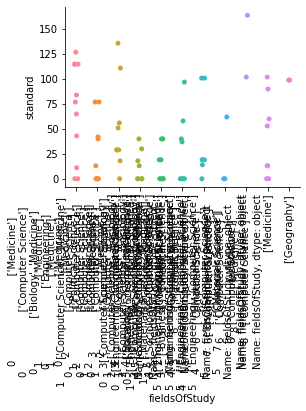

{"0                           ['Medicine']\n0                   ['Computer Science']\n0                ['Biology', 'Medicine']\n0                        ['Engineering']\n0                           ['Medicine']\n0                   ['Computer Science']\n0                   ['Computer Science']\n0                   ['Computer Science']\n0      ['Computer Science', 'Sociology']\n0    ['Engineering', 'Computer Science']\n0      ['Materials Science', 'Medicine']\nName: fieldsOfStudy, dtype: object",
 "1                           ['Medicine']\n1                           ['Medicine']\n1       ['Computer Science', 'Medicine']\n1                  ['Political Science']\n1                   ['Computer Science']\n1                   ['Computer Science']\n1                   ['Computer Science']\n1                   ['Computer Science']\n1    ['Engineering', 'Computer Science']\n1      ['Materials Science', 'Medicine']\nName: fieldsOfStudy, dtype: object",
 "2                         ['Medicine']

In [8]:
#sns.set_theme(style="ticks", color_codes=True)
g = sns.catplot(x="fieldsOfStudy", y="standard", data=multi_author_frame)
g.set_xticklabels(rotation=90)

#plt.scatter(set(multi_author_frame["fieldsOfStudy"],multi_author_frame["standard"])
plt.show()

setted = set(multi_author_frame["fieldsOfStudy"])
dictoffield={}
for i in setted:
    dictoffield[i]=np.mean(multi_author_frame[multi_author_frame["fieldsOfStudy"]==i]["standard"])
set(dictoffield.keys())  
#sns.jointplot(data = multi_author_frame,y="fieldsOfStudy",x="standard",kind="reg")

In [9]:
dictoffield.values()  


dict_values([133.0, 12.625, 14.75, 39.0, 29.0, 68.36363636363636, 24.9, 51.0, 99.0, 20.666666666666668, 41.375])

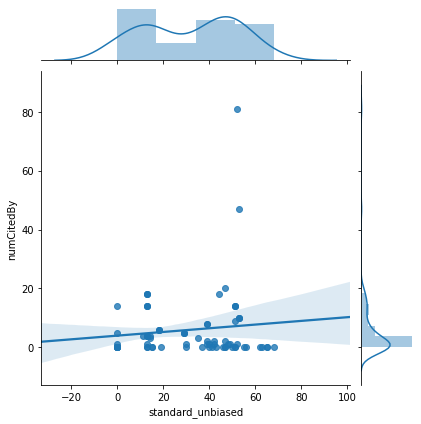

In [10]:
sns.jointplot(data = multi_author_frame,y="numCitedBy",x="standard_unbiased",kind="reg")
#g.ax_joint.set_xticks(multi_author_frame["link"])


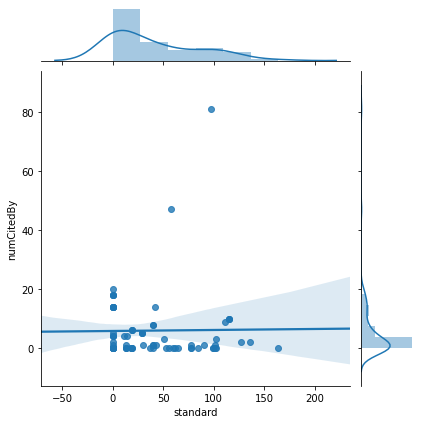

In [11]:
sns.jointplot(data = multi_author_frame,y="numCitedBy",x="standard",kind="reg")

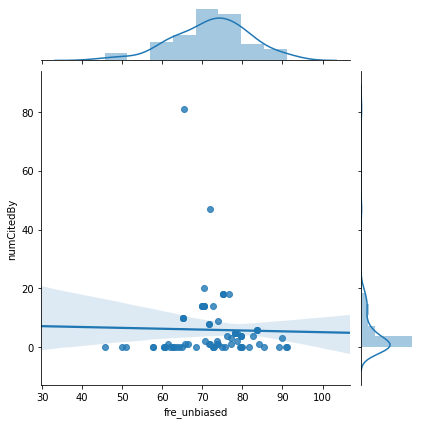

In [12]:
sns.jointplot(data = multi_author_frame,y="numCitedBy",x="fre_unbiased",kind="reg")

Harder to read manuscripts where cited more often

2021-06-13 12:14:25.324 INFO    numexpr.utils: NumExpr defaulting to 4 threads.


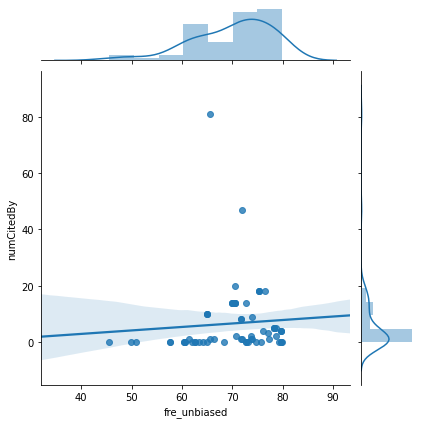

In [13]:
subset = multi_author_frame[multi_author_frame["fre_unbiased"]<=80]

sns.jointplot(data = subset,y="numCitedBy",x="fre_unbiased",kind="reg")

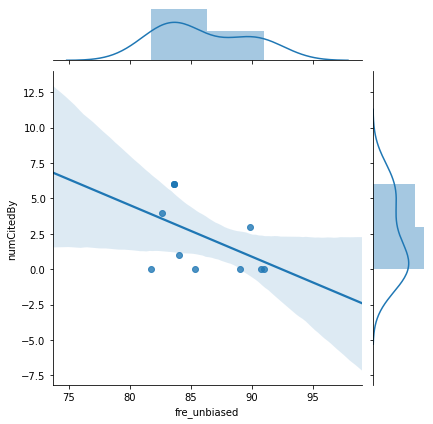

In [14]:
hard = multi_author_frame[multi_author_frame["fre_unbiased"]>=80]
sns.jointplot(data = hard,y="numCitedBy",x="fre_unbiased",kind="reg")

In [15]:
easy = multi_author_frame[multi_author_frame["fre_unbiased"]<=80]

In [26]:


#gs=[]
#for tok in hard["hard_snippet"]:
#    gs.append(tok)
#gs

#gs2= create_giant_strings(gs,not_want_list)
#art_cloud_wl(gs2)

In [27]:
#art_cloud(gs2)

/home/user/anaconda3/lib/python3.7/site-packages/streamlit/elements/pyplot.py:132: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "use_column_width" which is no longer supported as of 3.3 and will become an error two minor releases later



([('retroperitoneally', 1.0),
  ('photosynthesis', 0.8235294117647058),
  ('implementation', 0.8235294117647058),
  ('paravertebral', 0.7647058823529411),
  ('alternatively', 0.7647058823529411),
  ('metastasizing', 0.7647058823529411),
  ('practitioners', 0.7647058823529411),
  ('gynecological', 0.7647058823529411),
  ('retrospective', 0.7647058823529411),
  ('prospectively', 0.7647058823529411),
  ('professionals', 0.7647058823529411),
  ('technologists', 0.7647058823529411),
  ('localisation', 0.7058823529411765),
  ('progesterone', 0.7058823529411765),
  ('introduction', 0.7058823529411765),
  ('tuberculosis', 0.7058823529411765),
  ('infiltrative', 0.7058823529411765),
  ('fibromatosis', 0.7058823529411765),
  ('liriodendron', 0.7058823529411765),
  ('unacceptable', 0.7058823529411765),
  ('capabilities', 0.7058823529411765),
  ('particularly', 0.7058823529411765),
  ('increasingly', 0.7058823529411765),
  ('investigator', 0.7058823529411765),
  ('interpreting', 0.7058823529411765

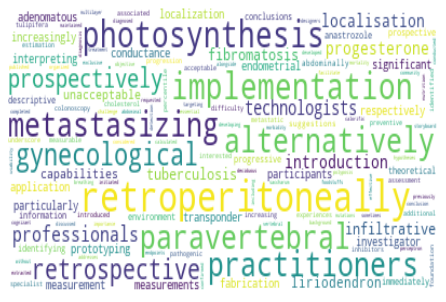

In [18]:
gs=[]
for tok in hard["tokens"]:
    gs.extend(tok)
gs

gs2= create_giant_strings(gs,not_want_list)
art_cloud_wl(gs2)
    

(<wordcloud.wordcloud.WordCloud at 0x7fac846a8bd0>,
 <Figure size 432x288 with 1 Axes>,
 <module 'matplotlib.pyplot' from '/home/user/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>)

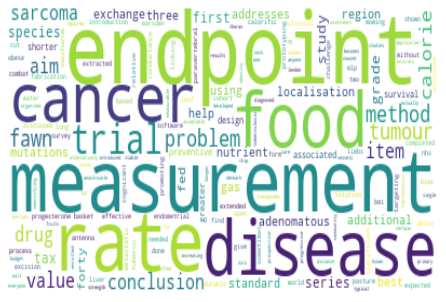

In [19]:
art_cloud(gs2)


In [20]:
subset = multi_author_frame[multi_author_frame["sp"]<=0.15]


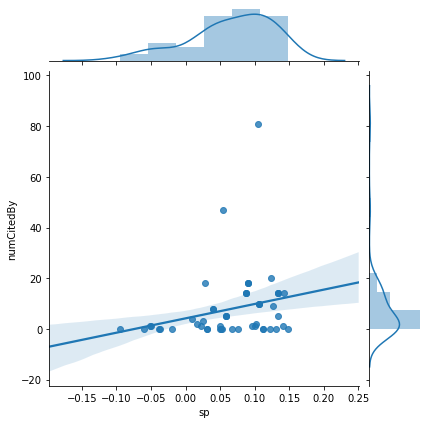

In [21]:
sns.jointplot(data = subset,y="numCitedBy",x="sp",kind="reg")

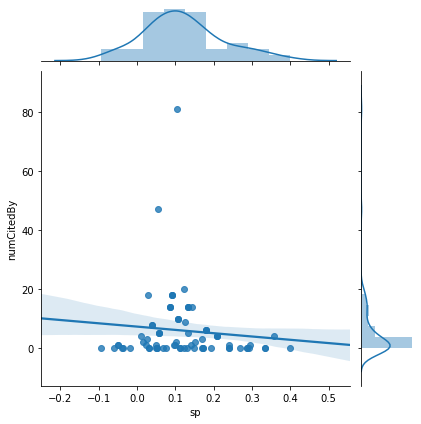

In [22]:
sns.jointplot(data = multi_author_frame,y="numCitedBy",x="sp",kind="reg")

Articles with too much positive sentiment were cited less often

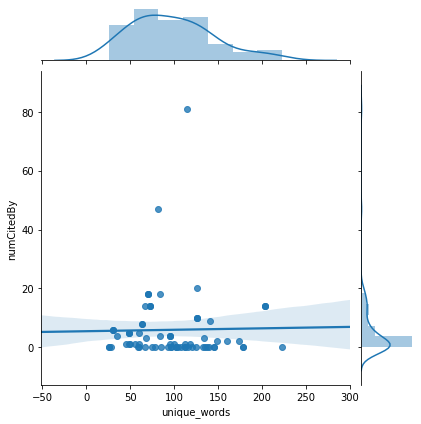

In [23]:
sns.jointplot(data = multi_author_frame,y="numCitedBy",x="unique_words",kind="reg")

Articles with more unique words were cited more often

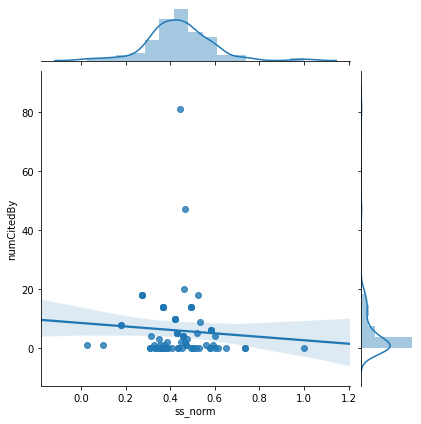

In [24]:
sns.jointplot(data = multi_author_frame,y="numCitedBy",x="ss_norm",kind="reg")

Articles with more sentiment subjectivity were cited slightly more often (not statistically significant).

In [28]:
def get_test_dataft(author_name):
    ar = call_from_front_end(author_name, tns=10, fast=False)
    author = pd.DataFrame(ar)
    try:
        corr, _ = pearsonr(author["numCitedBy"], author["standard"])
        return (author["numCitedBy"],author["standard"],author)
    except:
        print(author)
        return None,None,author

In [ ]:
multi_author_frameft = pd.DataFrame()
#df_basic = pd.DataFrame()
for auth in get_authors2:
    #get_test_data(author_name)
    try:
        (author_numCitedBy,author_standard,df) = get_test_dataft(author)
        multi_author_frameft = pd.concat([multi_author_frameft,df])
        #df_basic = pd.concat([df_basic,df])

    except:
        pass

                                    link  science big_words  standard  \
0     https://doi.org/10.3390/ma13183973    False        []     534.0   
1     https://doi.org/10.3390/ma13183973    False        []     534.0   
2  https://doi.org/10.3390/cryst10070574    False        []     533.0   
3  https://doi.org/10.3390/cryst10070574    False        []     533.0   
4     https://doi.org/10.3390/met8080644    False        []     495.0   
5     https://doi.org/10.3390/met8080644    False        []     495.0   
6      http://hdl.handle.net/10467/61924    False        []     200.0   
7  https://orcid.org/0000-0002-4244-5097    False        []      22.0   

   fre_unbiased  standard_unbiased  wcount  uniqueness  unique_words  \
0     29.083375               11.0    1371    0.546317           749   
1     29.083375               11.0    1371    0.546317           749   
2     29.540125               11.0    1372    0.543732           746   
3     29.540125               11.0    1372    0.543732

In [ ]:
multi_author_frameft

In [ ]:
sns.jointplot(data = multi_author_frameft,y="numCitedBy",x="standard",kind="reg")

In [ ]:
sns.jointplot(data = multi_author_frameft,y="numCitedBy",x="standard_unbiased",kind="reg")

In [ ]:
sns.jointplot(data = multi_author_frameft,y="numCitedBy",x="fre_unbiased",kind="reg")